# Negative Log Likelihood Code

We are using
$$
NLL(\mathbf{u}) = -2ln(\Pi_{i=1}^n \frac{\lambda_{i}^{m_i}(\mathbf{u})e^{-\lambda_{i}(\mathbf{u})}}{m_i!}) = 2\sum_{i=1}^n[\lambda_{i}(\mathbf{u})-m_iln\lambda_{i}(\mathbf{u})+lnm_i!]
$$

For most things related to binning/particle physics, probability follows the Poisson distrib.

$$
\mathscr{P}(m) = \frac{\lambda^me^{-\lambda}}{m!}
$$

In [2]:
#general imports with inclusion of neutrino survivable probability now in the .py folder 
import numpy as np
import matplotlib.pyplot as plt
from data_load import load_data
from data_load import pmumu
from scipy.special import gammaln
data, flux = load_data()
theta_fix = np.pi/4
dm2_fix = 0.002512121212121212

In [3]:
def lam_i(theta, dm2):
    prob = pmumu(theta, dm2)
    return flux * prob

In [4]:
log_m = gammaln(data+1)

def nll(theta, dm2):
    """ 
    Negative Log-Liklihood Function using equation above

    m_i = data (counts)
    lambda_i = flux * prob_mumu (model counts)
    """
    lam = lam_i(theta, dm2)
    return 2.0 * np.sum(lam - data * np.log(lam)) # + log_m)
    

In [5]:
dm2_range = np.linspace(1.4e-3, 3.4e-3, 100)
nll_dm2 = np.array([nll(theta_fix, dm2) for dm2 in dm2_range])

#print(nll_dm2)

In [6]:
dm2_approx = dm2_range[np.argmin(nll_dm2)]

print(dm2_approx)

0.002511111111111111


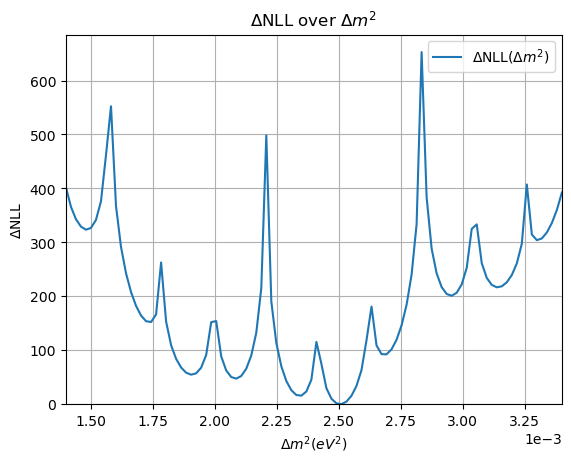

In [7]:
#plt.plot(dm2_range, nll_dm2, label = 'Raw Values Plot')
plt.plot(dm2_range, nll_dm2-np.min(nll_dm2), label = '$\Delta$NLL($\Delta m^2$)')    # plots the shifted values so that graph goes from 0
plt.xlabel('$\Delta m^2 (eV^2)$')
plt.ylabel('$\Delta$NLL')
plt.title('$\Delta$NLL over $\Delta m^2$')
plt.grid(1)
plt.legend()
plt.ticklabel_format(axis='x', style = 'sci', scilimits = (-3, -3))
plt.ylim(0)
plt.xlim(dm2_range.min(), dm2_range.max())
plt.show()
plt.close()

The above NLL is not a smooth U-shaped graph as we would expect from perfect data but we have obtained a minimum of at ~0.002511, next I will run a fine scan of $\Delta m^2$ and see what the graph looks like before moving on to $\theta _{23}$ and running a similar fine scan.

The m! term has been removed as it doesn't affect the NLL for the specific values of $\Delta m^2$ and $\theta_{23}$, since it is just observed data counts and is therefore a fixed constant. It can shift the NLL curve up and down but the actual minimum does not change. A test was done with gammaln to see any changes too.

100 has been chosen as it's got a good/sensible no. of values between 1.4e-3 and 3.4e-3 (using 2.4e-3 as the centre) without giving up accuracy (say if you used 50) and being quick to run.

0.0025045454545454546


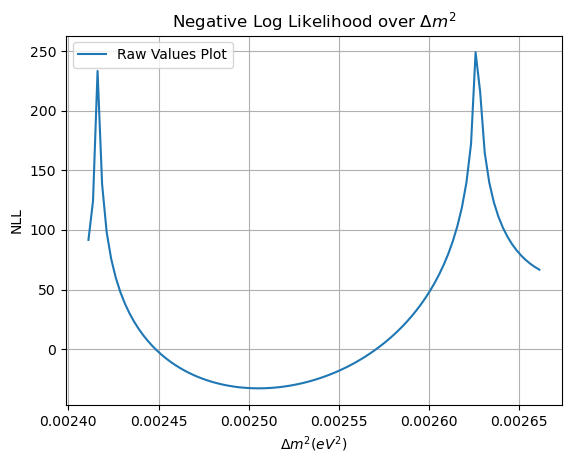

In [8]:
dm2_range_fine = np.linspace(dm2_approx-0.1e-3, dm2_approx+0.15e-3, 100)
nll_dm2_fine = np.array([nll(theta_fix, dm2) for dm2 in dm2_range_fine])
dm2_fine_val = dm2_range_fine[np.argmin(nll_dm2_fine)]

print(dm2_fine_val)

plt.plot(dm2_range_fine, nll_dm2_fine, label = 'Raw Values Plot')
#plt.plot(dm2_range_fine, nll_dm2_fine-np.min(nll_dm2_fine), label = 'Shifted')    # plots the shifted values so that graph goes from 0
plt.xlabel('$\Delta m^2 (eV^2)$')
plt.ylabel('NLL')
plt.title('Negative Log Likelihood over $\Delta m^2$')
plt.grid(1)
plt.legend()
#plt.ylim(0)
plt.show()
plt.close()

0.682265071234147


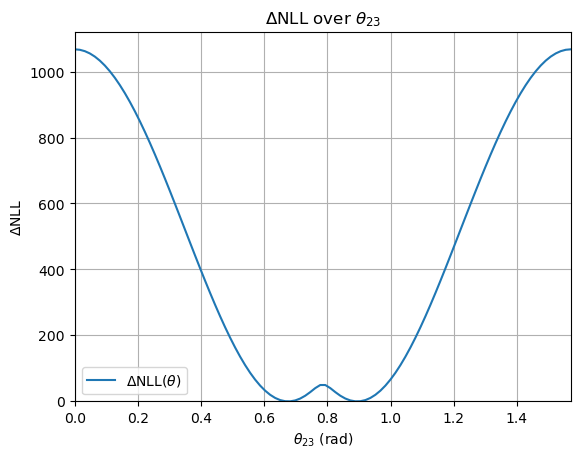

In [10]:
theta_range = np.linspace(0,np.pi/2, 100)
nll_theta = np.array([nll(theta, dm2_fix) for theta in theta_range])
theta_approx = theta_range[np.argmin(nll_theta)]

print(theta_approx)

#plt.plot(theta_range, nll_theta)
plt.plot(theta_range, nll_theta-np.min(nll_theta), label = '$\Delta$NLL($\\theta$)')    # plots the shifted values so that graph goes from 0
plt.xlabel('$\\theta_{23}$ (rad)')
plt.ylabel('$\Delta$NLL')
plt.title('$\Delta$NLL over $\\theta_{23}$')
plt.grid(1)
plt.ylim(0)
plt.xlim(theta_range.min(), theta_range.max())
plt.legend()
plt.show()
plt.close()

0.677214566183642


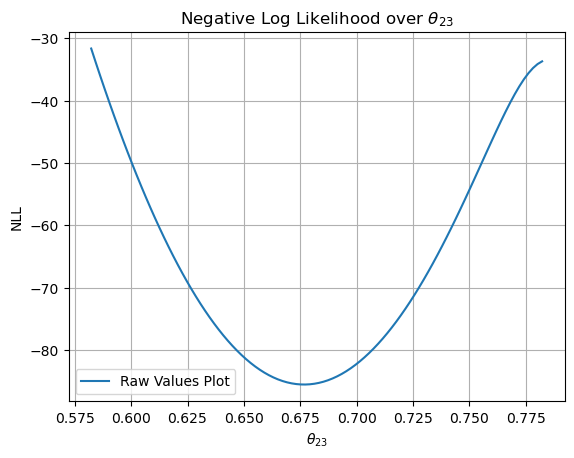

In [32]:
theta_range_fine = np.linspace(theta_approx-0.1, theta_approx+0.1, 100)
nll_theta_fine = np.array([nll(theta, dm2_fix) for theta in theta_range_fine])
theta_fine = theta_range_fine[np.argmin(nll_theta_fine)]

print(theta_fine)

plt.plot(theta_range_fine, nll_theta_fine, label = 'Raw Values Plot')
#plt.plot(dm2_range_fine, nll_dm2_fine-np.min(nll_dm2_fine), label = 'Shifted')    # plots the shifted values so that graph goes from 0
plt.xlabel('$\\theta_{23}$')
plt.ylabel('NLL')
plt.title('Negative Log Likelihood over $\\theta_{23}$')
plt.grid(1)
plt.legend()
#plt.ylim(0)
plt.show()
plt.close()

0.6663984416705622


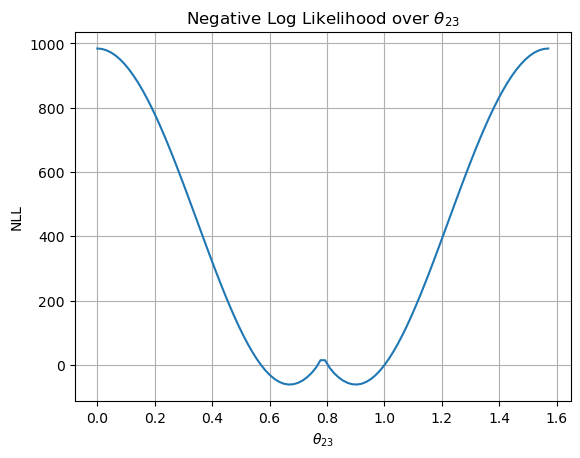

0.6694287447008652


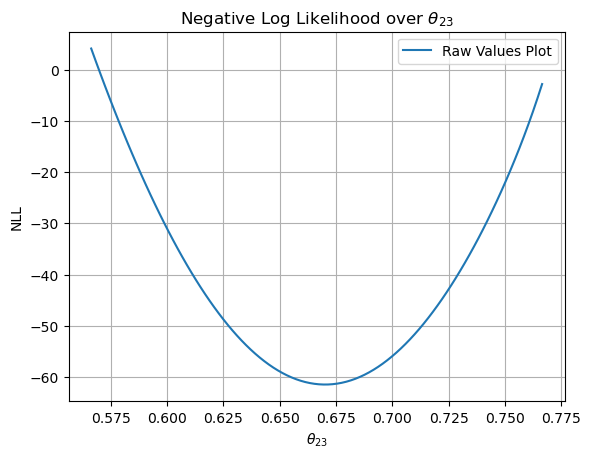

In [ ]:
dm2_given = 2.4e-3

nll_theta_test = np.array([nll(theta, dm2_given) for theta in theta_range])
theta_approx_test = theta_range[np.argmin(nll_theta_test)]

print(theta_approx_test)

plt.plot(theta_range, nll_theta_test)
#plt.plot(theta_range, nll_theta-np.min(nll_theta), label = 'Shifted')    # plots the shifted values so that graph goes from 0
plt.xlabel('$\\theta_{23}$')
plt.ylabel('NLL')
plt.title('Negative Log Likelihood over $\\theta_{23}$')
plt.grid(1)
#plt.ylim(0)
plt.show()
plt.close()

theta_range_fine_test = np.linspace(theta_approx_test-0.1, theta_approx_test+0.1, 100)
nll_theta_fine_test = np.array([nll(theta, dm2_given) for theta in theta_range_fine_test])
theta_fine_test = theta_range_fine_test[np.argmin(nll_theta_fine_test)]

print(theta_fine_test)

plt.plot(theta_range_fine_test, nll_theta_fine_test, label = 'Raw Values Plot')
plt.xlabel('$\\theta_{23}$')
plt.ylabel('NLL')
plt.title('Negative Log Likelihood over $\\theta_{23}$ ')
plt.grid(1)
plt.legend()
#plt.ylim(0)
plt.show()
plt.close()

0.002490909090909091


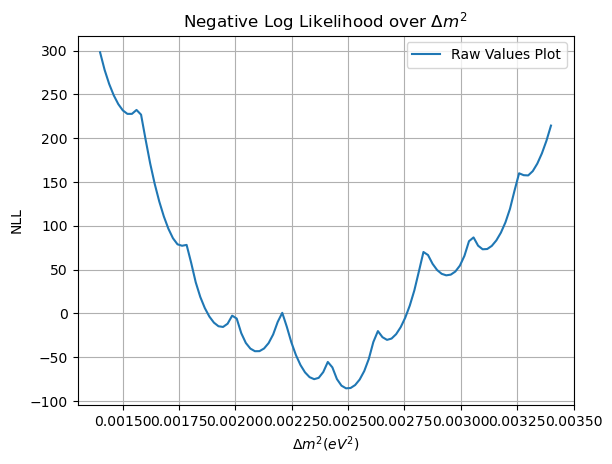

0.002512121212121212


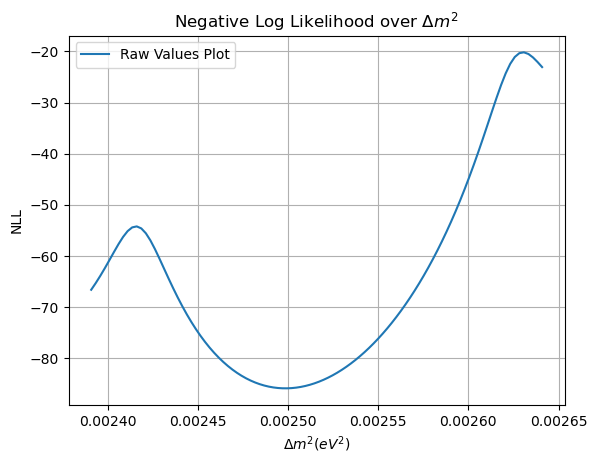

In [37]:
theta_fix2 = 0.6694287447008652

nll_dm2_test = np.array([nll(theta_fix2, dm2) for dm2 in dm2_range])

dm2_approx_test = dm2_range[np.argmin(nll_dm2_test)]

print(dm2_approx_test)
plt.plot(dm2_range, nll_dm2_test, label = 'Raw Values Plot')
#plt.plot(dm2_range, nll_dm2-np.min(nll_dm2), label = 'Shifted')    # plots the shifted values so that graph goes from 0
plt.xlabel('$\Delta m^2 (eV^2)$')
plt.ylabel('NLL')
plt.title('Negative Log Likelihood over $\Delta m^2$')
plt.grid(1)
plt.legend()
#plt.ylim(0)
plt.show()
plt.close()

dm2_range_fine_test = np.linspace(dm2_approx_test-0.1e-3, dm2_approx_test+0.15e-3, 100)
nll_dm2_fine_test = np.array([nll(theta_fix2, dm2) for dm2 in dm2_range_fine_test])
dm2_fine_test = dm2_range_fine_test[np.argmin(nll_dm2_fine_test)]

print(dm2_fine_val)

plt.plot(dm2_range_fine_test, nll_dm2_fine_test, label = 'Raw Values Plot')
plt.xlabel('$\Delta m^2 (eV^2)$')
plt.ylabel('NLL')
plt.title('Negative Log Likelihood over $\Delta m^2$')
plt.grid(1)
plt.legend()
#plt.ylim(0)
plt.show()
plt.close()

Graphs are a little different but since NLL is a 2D surface and we're looking at 1D slices of it, it's not too worrying. Fits are generally stable going the other way around (apologies for readability).

$\Delta m^2$ is very tightly constrained by energy so it's given that it stayed pretty much the same going the other way around but with $\theta_{23}$, which dictates the amplitude of neutrino oscillations, being less tightly constrained due to noise(?), we can see there is a $~\pm 0.01$ difference. Not crazy bad, not crazy good either. 

This was pretty much assumed as holding one variable fixed to approximate the other is not going to be totally accurate for a function depending on both variables.

In [42]:
print(((theta_fine- theta_fine_test)/theta_fine_test)*100)
print(((0.002512121212121212 - dm2_fine_test)/0.002512121212121212) * 100)

1.163054551273539
0.5026135906714777
